In [1]:
import pandas as pd

# Part I : EDA - Exploratory Data Analysis

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
for col in df:
    print(col, df[df[col] == 0][col].count())

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


There's no null values in any of the columns but there's columns with 0s, that might be because nulls were replaced with 0. We have to look at each column to check if its possible for that column to contain a 0, if it is then we leave it as is, if it can't, then we'll convert the zeros to either an appropriate value or we'll remove the rows containing 0s. Through online research we'll decide which columns are allowed to have 0s. 

1. Pregrnancies can and does have 0s.
2. Glucose cannot have 0s, (5 rows have 0s)
3. Blood Pressure cannot have 0s. (35 rows have 0s)
4. Skin Thickness cannot have 0s. (227 rows have 0s)
5. Insulin cannot have 0s. (374 rows have 0s)
6. BMI cannot have 0s. (11 rows have 0s)
7. DiabetesPedigreeFunction  and Age don't have 0s.
8. 0s in Outcome means the person doesn't have diabetes, so its fine

In [177]:
X = df.drop('Outcome', axis=1)
y = df['Outcome'] 

In [178]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [179]:
import statsmodels.api as sm

X_sm = sm.add_constant(X) 
lin_reg = sm.OLS(y,X_sm)

In [180]:
model = lin_reg.fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.36e-55
Time:                        20:34:57   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We can see Skin thickness and Insulin have a very high p value probably because they have alot of (nulls, ie. 0s)

In [181]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [182]:
# will drop Glucose == 0 for this calculation to not effect the averages
df.drop(df[df['Glucose'] == 0].index)

diabetic_glucose = df[df['Outcome'] == 1]['Glucose'].mean()
non_diabetic_glucose = df[df['Outcome'] == 0]['Glucose'].mean()

print('Average glucose level for individuals with diabetes:', diabetic_glucose)
print('Average glucose level for individuals without diabetes:', non_diabetic_glucose)

Average glucose level for individuals with diabetes: 141.25746268656715
Average glucose level for individuals without diabetes: 109.98


In [183]:
# will drop BMI == 0 for this calculation to not effect the averages
df.drop(df[df['BMI'] == 0].index)

diabetic_BMI = df[df['Outcome'] == 1]['BMI'].mean()
non_diabetic_BMI = df[df['Outcome'] == 0]['BMI'].mean()

print('Average BMI for individuals with diabetes:', diabetic_BMI)
print('Average BMI for individuals without diabetes:', non_diabetic_BMI)

Average BMI for individuals with diabetes: 35.14253731343284
Average BMI for individuals without diabetes: 30.3042


In [281]:
diabetic_age = df[df['Outcome'] != 0]['Age'].mean()
non_diabetic_age = df[df['Outcome'] == 0]['Age'].mean()

print('Average Age for individuals with diabetes:', diabetic_age)
print('Average Age for individuals without diabetes:', non_diabetic_age)

Average Age for individuals with diabetes: 37.06716417910448
Average Age for individuals without diabetes: 31.19


Average Age: 33 (could be considered young) 

Possible outliers: 
BloodPressure, SkinThickness, Insulin, BMI: all these have a minimum of 0 and it effects the mean as welll. 

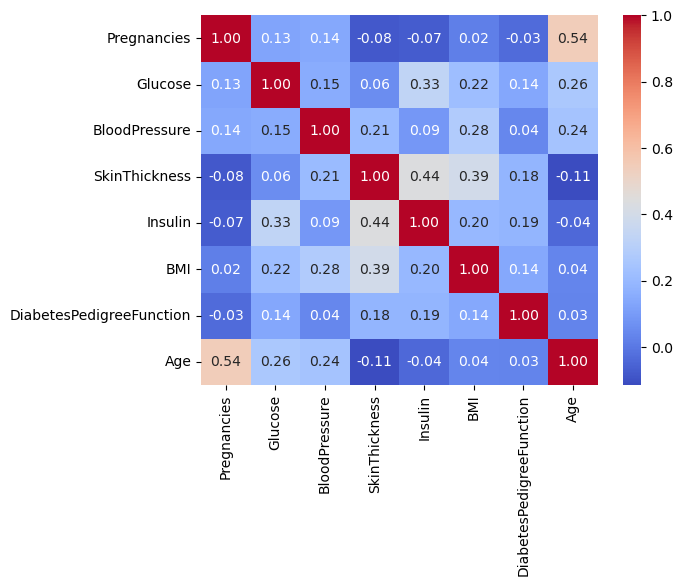

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = X.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


The only correlation between the predictor variable is between age and pregnanices, makes sense (usually you get more kids as you get older)

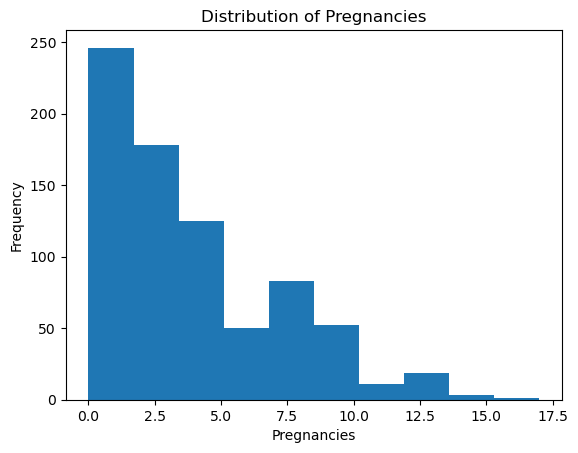

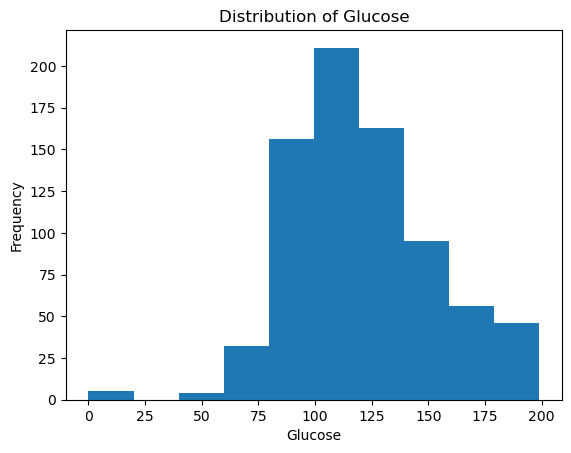

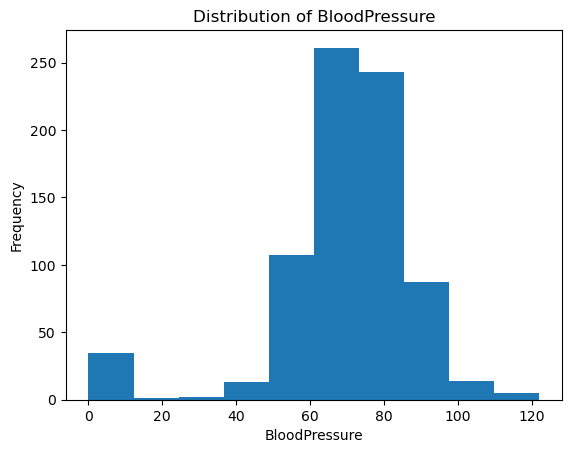

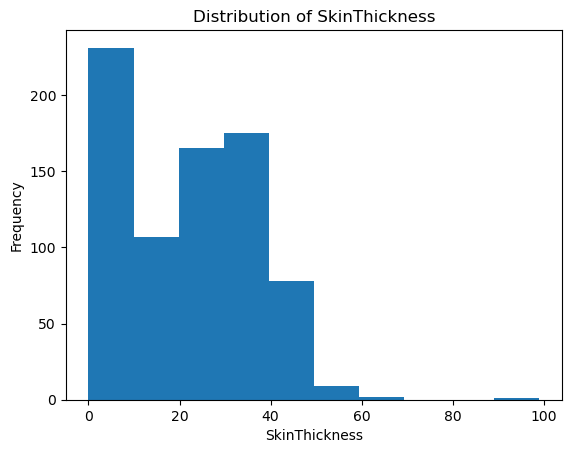

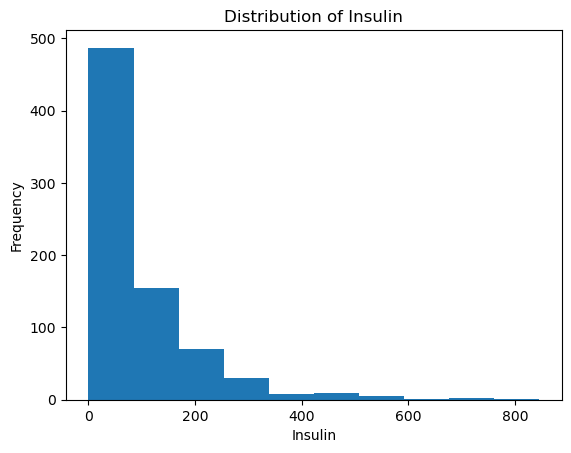

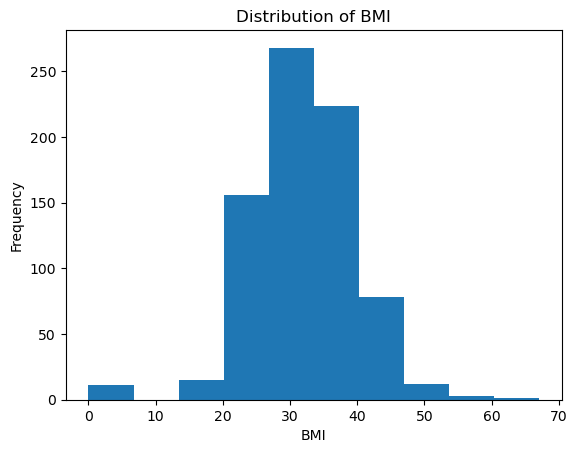

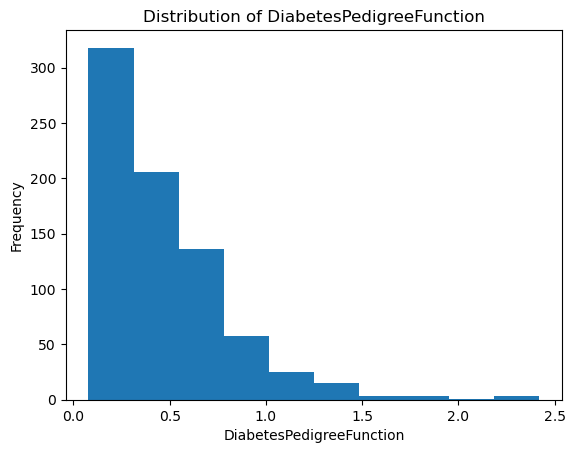

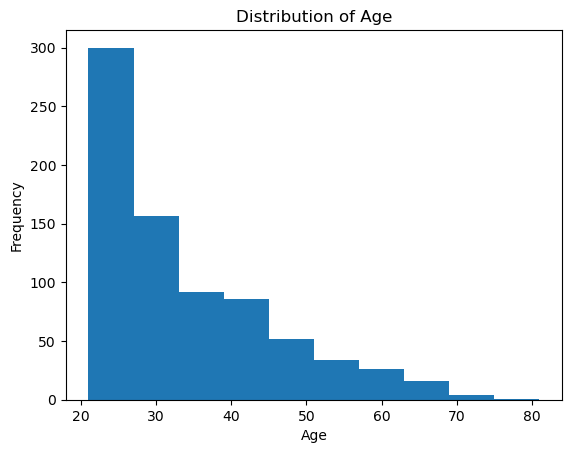

In [185]:
for col in X:
    plt.hist(X[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

Normal Distributions: Glucose, Blood pressure, BMI, (potentially Skin Thinckness without the 0s.)

Right Skewed distributions: Pregnencies, Age, Diabetes Pedegree Function, Insulin

# Part II : Preprocessing & Feature Engineering

Columns with missing values (ie 0s) that need to be handeled:
1. Glucose: 5 rows
2. Blood Pressure: 35 rows
3. Skin Thickness: 227 rows 
4. BMI: 11 rows
5. Insulin: 374 rows

Will drop rows with glucose = 0 or BMI = 0 because theres isn't that many, (16 total)

Will replace 0s with the mean for Blood Pressure, Skin Thickness nad Insulin

In [186]:
X.drop(X[X['Glucose'] == 0].index, inplace=True)
X.drop(X[X['BMI'] == 0].index, inplace=True)


In [188]:
# i want to get the mean without the 0s, and then replace the 0s with that mean.

X.drop(X[X['BloodPressure'] == 0].index)
X.drop(X[X['SkinThickness'] == 0].index)
X.drop(X[X['Insulin'] == 0].index)


bp_mean = X['BloodPressure'].mean()
st_mean = X['SkinThickness'].mean()
insulin_mean = X['Insulin'].mean()

print('blood pressure mean:', bp_mean)
print('skin thickness mean:', st_mean)
print('insulin mean:', insulin_mean)

blood pressure mean: 69.70478723404256
skin thickness mean: 20.715425531914892
insulin mean: 81.34840425531915


In [189]:
# Rounding to whole because all values are whole for these columns in the dataset, (bp=70, st=21, insulin=81)

X['BloodPressure'].replace(0, 70, inplace=True)
X['SkinThickness'].replace(0, 21, inplace=True)
X['Insulin'].replace(0, 81, inplace=True)


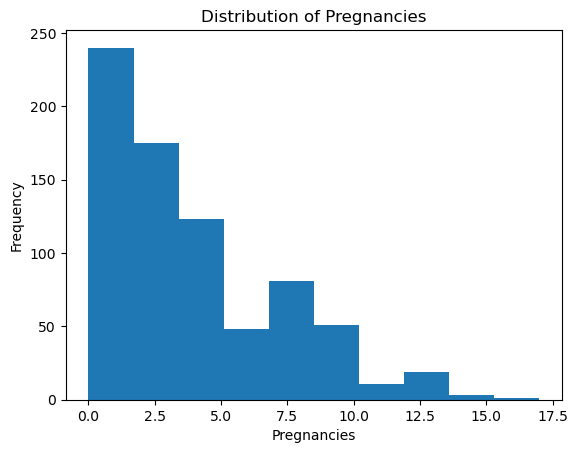

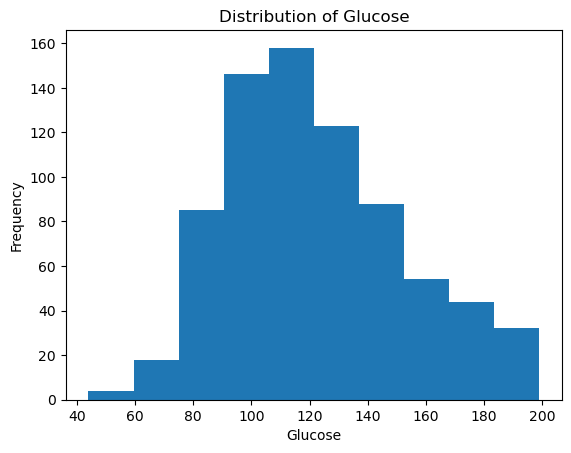

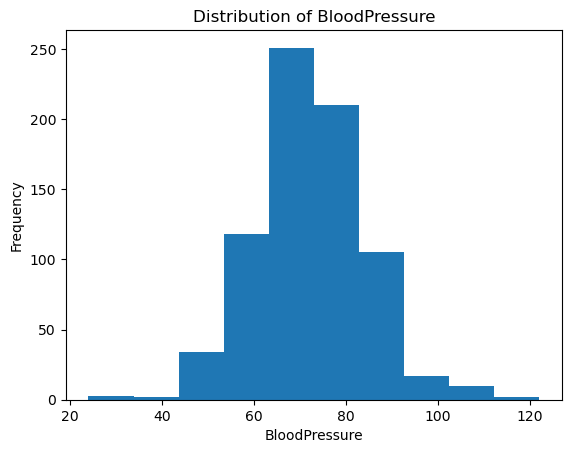

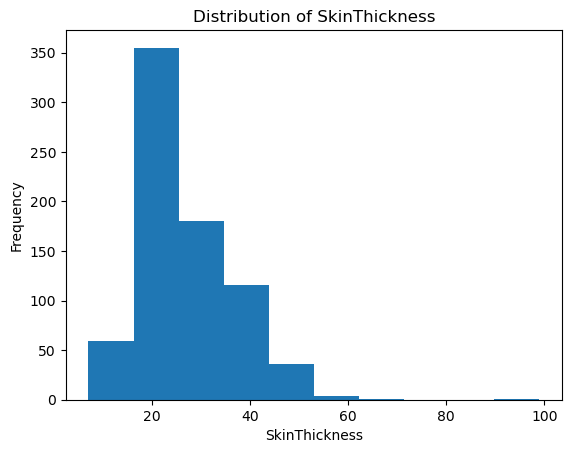

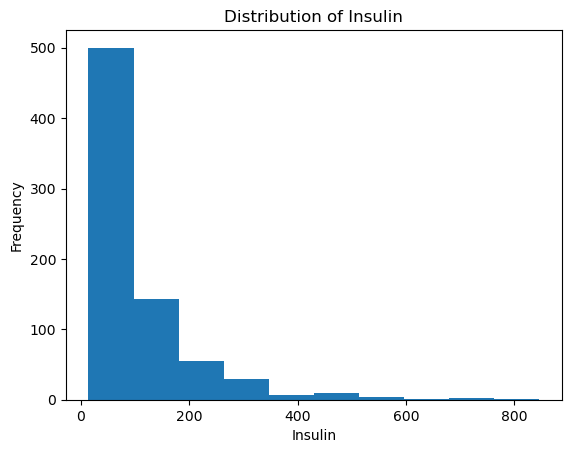

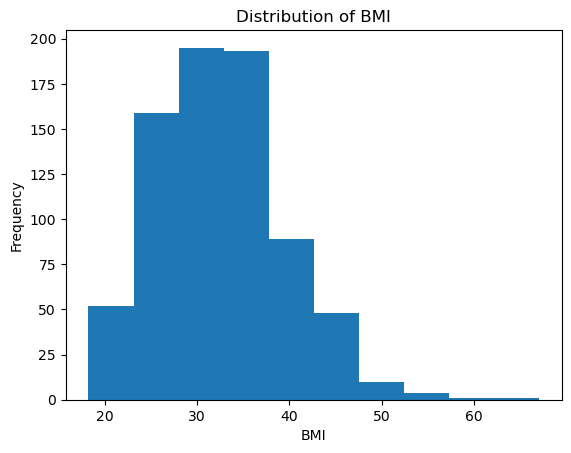

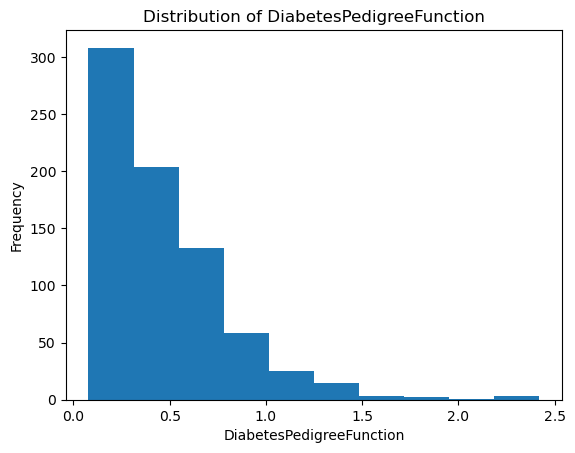

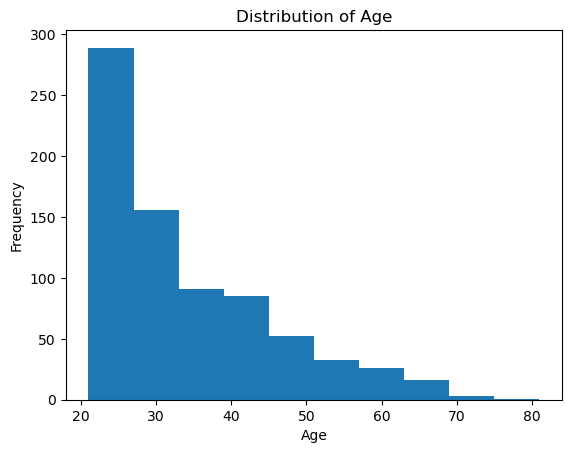

In [190]:
for col in X:
    plt.hist(X[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

In [191]:
X_log = X.copy()

In [192]:
# for col in X_log.columns:
#     X_log[col].replace(0, 1e-10, inplace=True)

In [193]:
for col in X_log.columns:
    X_log[col].replace(0, np.exp(-1), inplace=True)

In [194]:
#will apply log to all columns that are skewed: (Pregnencies, Age, Diabetes Pedegree Function, Insulin, skin thickness)

import numpy as np

for col in X_log[['Pregnancies', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness']]:
    X_log[col] = X_log[col].apply(np.log) 


In [195]:
X_log.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.791759,148,72,3.555348,4.394449,33.6,-0.466809,3.912023
1,0.000000,85,66,3.367296,4.394449,26.6,-1.046969,3.433987
2,2.079442,183,64,3.044522,4.394449,23.3,-0.397497,3.465736
3,0.000000,89,66,3.135494,4.543295,28.1,-1.789761,3.044522
4,-1.000000,137,40,3.555348,5.123964,43.1,0.827678,3.496508


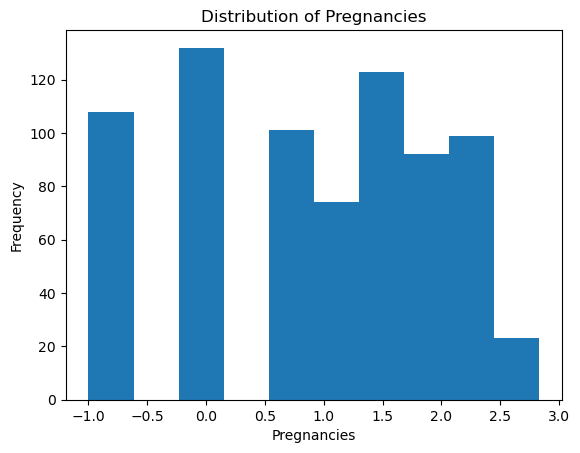

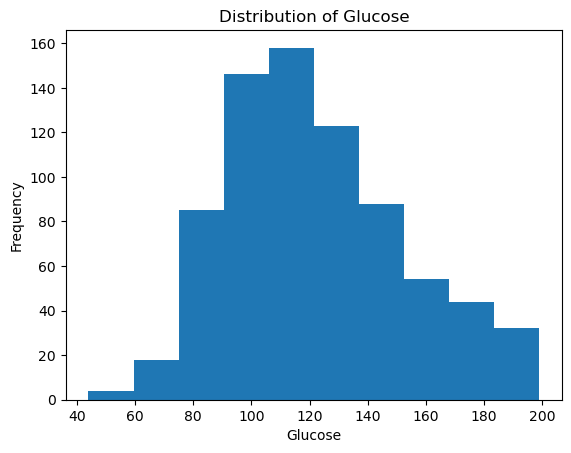

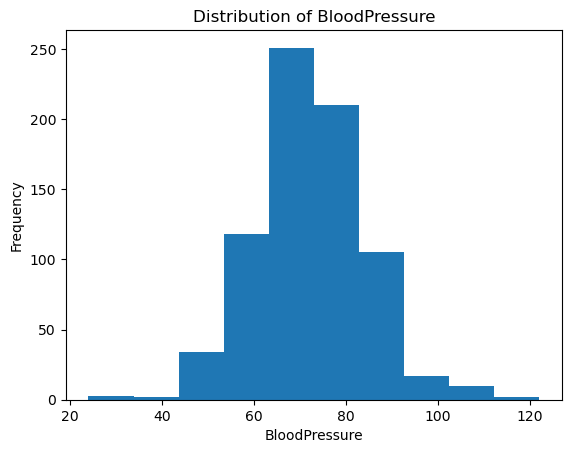

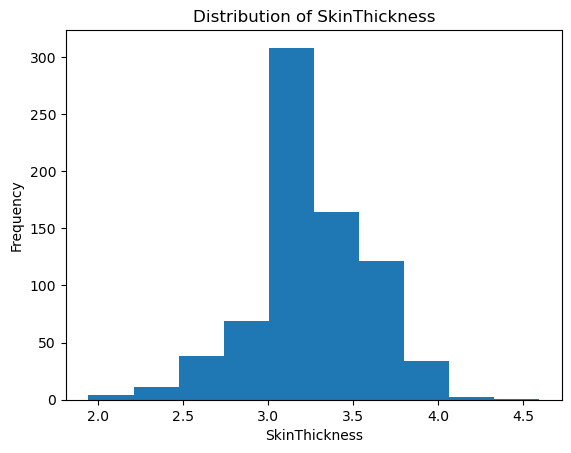

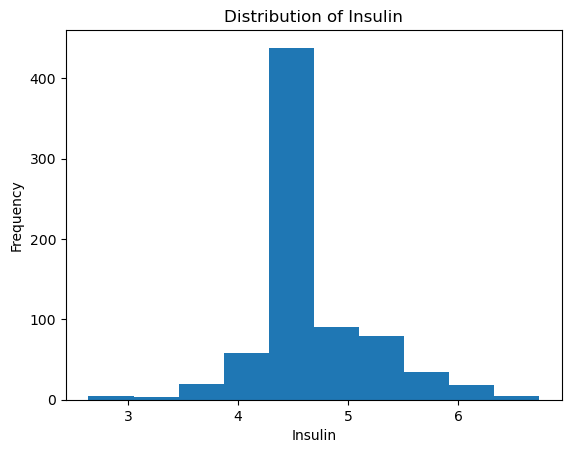

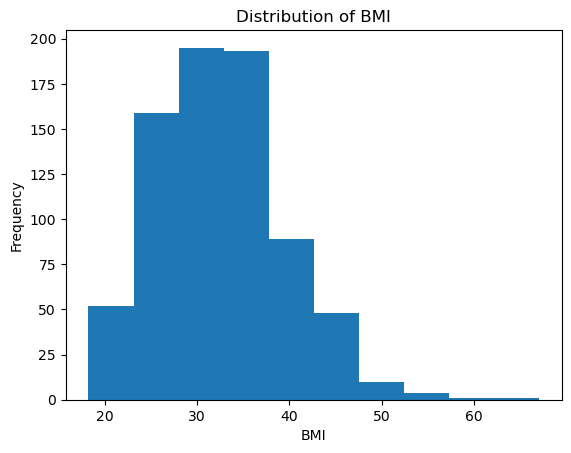

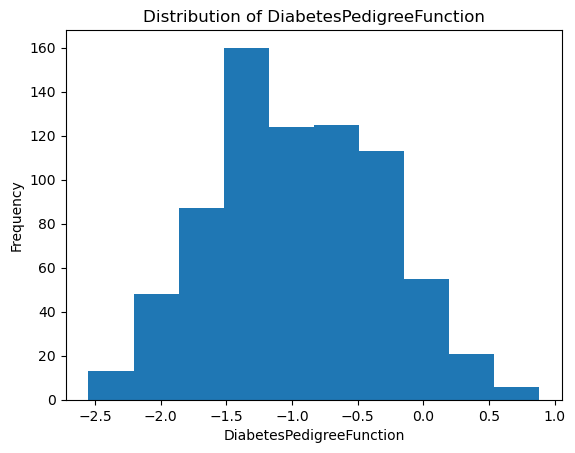

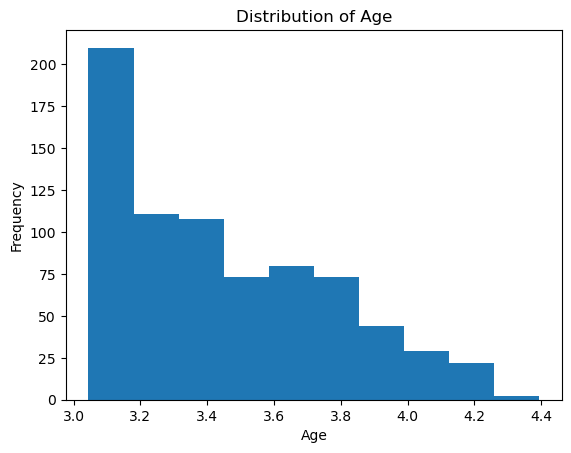

In [196]:
for col in X_log:
    plt.hist(X_log[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [197]:
X_scaled = X_log.copy()

In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))

In [214]:
X_scaled.columns = X.columns
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.834034,0.852119,-0.025616,0.937718,-0.401719,0.165409,0.761343,1.434209
1,-0.835635,-1.207994,-0.519552,0.398898,-0.401719,-0.845521,-0.141270,-0.054566
2,1.102113,1.996626,-0.684198,-0.525933,-0.401719,-1.322102,0.869179,0.044311
3,-0.835635,-1.077194,-0.519552,-0.265275,-0.127740,-0.628893,-1.296906,-1.267500
4,-1.767495,0.492416,-2.659942,0.937718,0.941096,1.537386,2.775306,0.140145
...,...,...,...,...,...,...,...,...
747,1.310051,-0.684791,0.303674,1.842720,1.068091,0.064316,-1.260081,2.153974
748,-0.189719,0.001913,-0.190262,0.194149,-0.401719,0.627549,-0.190808,-0.484816
749,0.664135,-0.030787,-0.025616,-0.265275,0.194758,-0.903288,-0.700624,-0.156686
750,-0.835635,0.132714,-1.013488,-0.525933,-0.401719,-0.340056,-0.150160,1.241507


# Part III : Training ML Model

In [215]:
X_scaled.shape

(752, 8)

In [216]:
y.shape

(768,)

In [217]:
df_dropped = df.copy()

In [218]:
df_dropped.drop(df_dropped[df_dropped['Glucose'] == 0].index, inplace=True)
df_dropped.drop(df_dropped[df_dropped['BMI'] == 0].index, inplace=True)

In [219]:
df_dropped.shape

(752, 9)

In [220]:
new_y = df_dropped['Outcome']

In [221]:
new_y.shape

(752,)

X_scaled
new_y

### Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [226]:
lr = LogisticRegression()

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, new_y, test_size=0.2)

lr.fit(X_train, y_train)

LogisticRegression()

In [269]:
y_pred = lr.predict(X_test)

In [270]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        94
           1       0.75      0.53      0.62        57

    accuracy                           0.75       151
   macro avg       0.75      0.71      0.72       151
weighted avg       0.75      0.75      0.74       151



In [271]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy =', accuracy)
print('F1 Score for the enitre model=', f1)
print('ROC AUC score =', auc)

Accuracy = 0.7549668874172185
F1 Score for the enitre model= 0.6185567010309279
ROC AUC score = 0.7099664053751399


### Random Forest Classifier

In [272]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
rfc = RandomForestClassifier()

In [274]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [275]:
rfc_y_pred = rfc.predict(X_test)

In [276]:
print(classification_report(y_test, rfc_y_pred)) 

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        94
           1       0.73      0.47      0.57        57

    accuracy                           0.74       151
   macro avg       0.73      0.68      0.69       151
weighted avg       0.73      0.74      0.72       151



In [277]:
accuracy = accuracy_score(y_test, rfc_y_pred)
f1 = f1_score(y_test, rfc_y_pred)
auc = roc_auc_score(y_test, rfc_y_pred)


print('Accuracy =', accuracy)
print('F1 Score for the enitre model=', f1)
print('ROC AUC score =', auc)

Accuracy = 0.7350993377483444
F1 Score for the enitre model= 0.5744680851063829
ROC AUC score = 0.6836506159014557


Both models have very similar scores, if you keep calling them the scores change and it keeps switching on whats better than the other. I would pick the random forest classifier only because its more robust. 

# Part IV : Conclusion


* Diabitics on average had higher Glucose 
* Diabitics on average had higher BMI than non-diabetics
* Given someones Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age, you could predict weather they have diabities with a ~75% accuracy
* Diabitics on average were 6 years older than non-diabetics